In [1]:
from libraries import lib
from libraries.NeuralStates import *
import qutip as qt
import torch.nn as nn 
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def amp_phase(nn_output):
    return nn_output[:, 0] * torch.exp(1.j * 2 * np.pi * nn_output[:, 1])
def bitflip_x(x, N, flips):
    new_x = x
    for _ in range(flips):
        new_x = x ^ (1 << npr.randint(0, N))
    return new_x

In [3]:
num_epochs = 50
data_rate = 1

In [4]:
N = 30
J = 1

In [5]:
Gamma = 10

In [6]:
num_samples = 500

In [7]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 1)
for epoch in range(num_epochs):
    loss = lib.TFIM_expectation_using_locals(MHNeuralState(N, model, amp_phase, 
                                                           lambda x: bitflip_x(x, N, 1), 2 ** (N - 1), num_samples), 
                                                           N, J, Gamma, model, amp_phase)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
        print(epoch, loss.item())
print(loss_data[-1])
print(min(loss_data))

0 -301.8331298828125
1 -296.7216796875
2 -300.4884948730469
3 -301.8003845214844
4 -301.142822265625
5 -301.24432373046875
6 -300.4761657714844
7 -300.9714050292969
8 -301.6408996582031
9 -300.4853210449219
10 -300.4195251464844
11 -300.9499816894531
12 -301.05975341796875
13 -300.6775207519531
14 -299.4649963378906
15 -299.9505920410156
16 -299.89208984375
17 -300.7600402832031
18 -300.8160400390625
19 -300.9811706542969
20 -300.3591613769531
21 -299.9916076660156
22 -301.92529296875
23 -301.5655517578125
24 -300.1961975097656
25 -301.88330078125
26 -299.88525390625
27 -299.8219909667969
28 -300.9416809082031
29 -301.1670227050781
30 -301.05975341796875
31 -299.6164855957031
32 -300.8132629394531
33 -299.7536315917969
34 -299.4492492675781
35 -299.849365234375
36 -300.125
37 -300.8869934082031
38 -300.6722717285156
39 -299.5206604003906
40 -301.1252746582031
41 -300.44537353515625
42 -300.03741455078125
43 -300.06610107421875
44 -299.4156188964844
45 -300.0663757324219
46 -300.9495849

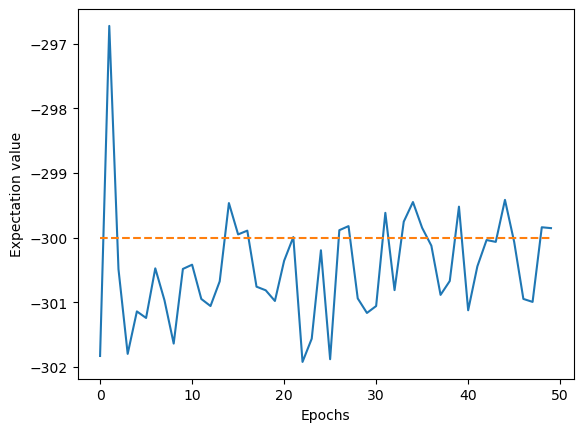

In [8]:
# ground state energy about -10N
plt.plot(epochs, loss_data)
plt.plot([0, epochs[-1]], [-10 * N] * 2, linestyle = '--')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

In [9]:
Gamma = 0.1

In [11]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 1)
for epoch in range(num_epochs):
    loss = lib.TFIM_expectation_using_locals(MHNeuralState(N, model, amp_phase, 
                                                           lambda x: bitflip_x(x, N, 1), 2 ** (N - 1), num_samples), 
                                                           N, J, Gamma, model, amp_phase)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
        print(epoch, loss)
print(loss_data[-1])
print(min(loss_data))

0 tensor(-3.3613, grad_fn=<SelectBackward0>)
1 tensor(-3.3025, grad_fn=<SelectBackward0>)
2 tensor(-4.2200, grad_fn=<SelectBackward0>)
3 tensor(-4.6979, grad_fn=<SelectBackward0>)
4 tensor(-7.9241, grad_fn=<SelectBackward0>)
5 tensor(-19.4516, grad_fn=<SelectBackward0>)
6 tensor(-25.3188, grad_fn=<SelectBackward0>)
7 tensor(-28.0915, grad_fn=<SelectBackward0>)
8 tensor(-29.5582, grad_fn=<SelectBackward0>)
9 tensor(-29.8260, grad_fn=<SelectBackward0>)
10 tensor(-29.9168, grad_fn=<SelectBackward0>)
11 tensor(-29.9747, grad_fn=<SelectBackward0>)
12 tensor(-30.0025, grad_fn=<SelectBackward0>)
13 tensor(-30.0200, grad_fn=<SelectBackward0>)
14 tensor(-30.0326, grad_fn=<SelectBackward0>)
15 tensor(-30.0406, grad_fn=<SelectBackward0>)
16 tensor(-30.0470, grad_fn=<SelectBackward0>)
17 tensor(-30.0517, grad_fn=<SelectBackward0>)
18 tensor(-30.0553, grad_fn=<SelectBackward0>)
19 tensor(-30.0580, grad_fn=<SelectBackward0>)
20 tensor(-30.0603, grad_fn=<SelectBackward0>)
21 tensor(-30.0620, grad_fn=

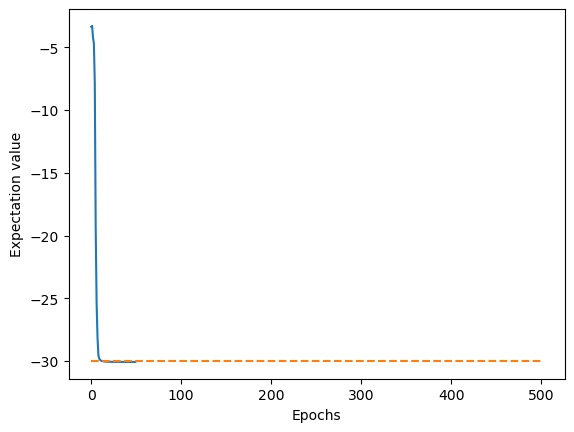

In [ ]:
# ground state energy about -N
plt.plot(epochs, loss_data)
plt.plot([0, epochs[-1]], [-N] * 2, linestyle = '--')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

In [14]:
Gamma = 1

In [17]:
num_samples

500

In [16]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 1)
for epoch in range(num_epochs):
    loss = lib.TFIM_expectation_using_locals(MHNeuralState(N, model, amp_phase, 
                                                           lambda x: bitflip_x(x, N, 1), 2 ** (N - 1), num_samples), 
                                                           N, J, Gamma, model, amp_phase)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
        print(epoch, loss)
print(loss_data[-1])
print(min(loss_data))

0 tensor(-29.9198, grad_fn=<SelectBackward0>)
1 tensor(-30.9086, grad_fn=<SelectBackward0>)
2 tensor(-31.4799, grad_fn=<SelectBackward0>)
3 tensor(-30.9443, grad_fn=<SelectBackward0>)
4 tensor(-30.4083, grad_fn=<SelectBackward0>)
5 tensor(-29.2357, grad_fn=<SelectBackward0>)
6 tensor(-30.1912, grad_fn=<SelectBackward0>)
7 tensor(-30.5385, grad_fn=<SelectBackward0>)
8 tensor(-29.4413, grad_fn=<SelectBackward0>)
9 tensor(-30.2727, grad_fn=<SelectBackward0>)
10 tensor(-31.0875, grad_fn=<SelectBackward0>)
11 tensor(-30.1171, grad_fn=<SelectBackward0>)
12 tensor(-30.3385, grad_fn=<SelectBackward0>)
13 tensor(-29.8252, grad_fn=<SelectBackward0>)
14 tensor(-29.9357, grad_fn=<SelectBackward0>)
15 tensor(-30.0690, grad_fn=<SelectBackward0>)
16 tensor(-26.6943, grad_fn=<SelectBackward0>)
17 tensor(-29.7679, grad_fn=<SelectBackward0>)
18 tensor(-29.7157, grad_fn=<SelectBackward0>)
19 tensor(-28.8783, grad_fn=<SelectBackward0>)
20 tensor(-31.4488, grad_fn=<SelectBackward0>)
21 tensor(-30.1017, gra

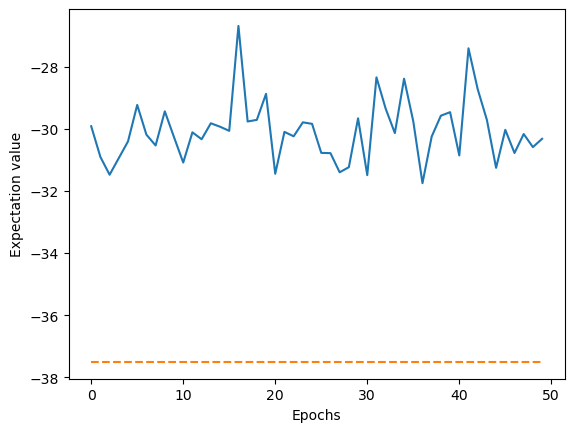

In [19]:
# ground state energy about -1.25 * N
plt.plot(epochs, loss_data)
plt.plot([0, epochs[-1]], [-1.25 * N] * 2, linestyle = '--')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

In [20]:
num_samples = 750

In [21]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 1)
for epoch in range(num_epochs):
    loss = lib.TFIM_expectation_using_locals(MHNeuralState(N, model, amp_phase, 
                                                           lambda x: bitflip_x(x, N, 1), 2 ** (N - 1), num_samples), 
                                                           N, J, Gamma, model, amp_phase)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
        print(epoch, loss)
print(loss_data[-1])
print(min(loss_data))

0 tensor(-30.1892, grad_fn=<SelectBackward0>)
1 tensor(-31.2344, grad_fn=<SelectBackward0>)
2 tensor(-30.5227, grad_fn=<SelectBackward0>)
3 tensor(-29.4075, grad_fn=<SelectBackward0>)
4 tensor(-30.2712, grad_fn=<SelectBackward0>)
5 tensor(-33.2749, grad_fn=<SelectBackward0>)
6 tensor(-33.1392, grad_fn=<SelectBackward0>)
7 tensor(-33.4943, grad_fn=<SelectBackward0>)
8 tensor(-15.9753, grad_fn=<SelectBackward0>)
9 tensor(-28.0808, grad_fn=<SelectBackward0>)
10 tensor(-29.8743, grad_fn=<SelectBackward0>)
11 tensor(-33.6115, grad_fn=<SelectBackward0>)
12 tensor(-34.3888, grad_fn=<SelectBackward0>)
13 tensor(-35.0595, grad_fn=<SelectBackward0>)
14 tensor(-35.9785, grad_fn=<SelectBackward0>)
15 tensor(-35.4454, grad_fn=<SelectBackward0>)
16 tensor(-37.7086, grad_fn=<SelectBackward0>)
17 tensor(-39.3070, grad_fn=<SelectBackward0>)
18 tensor(-31.2009, grad_fn=<SelectBackward0>)
19 tensor(-31.0758, grad_fn=<SelectBackward0>)
20 tensor(-36.6058, grad_fn=<SelectBackward0>)
21 tensor(-39.8149, gra

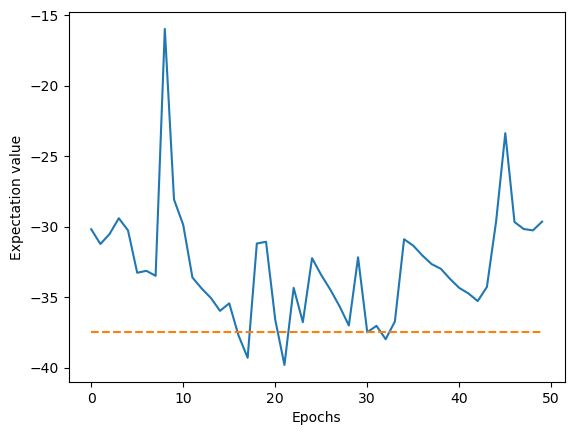

In [22]:
# ground state energy about -1.25 * N
plt.plot(epochs, loss_data)
plt.plot([0, epochs[-1]], [-1.25 * N] * 2, linestyle = '--')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

In [23]:
num_samples = 1000

In [24]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 1)
for epoch in range(num_epochs):
    loss = lib.TFIM_expectation_using_locals(MHNeuralState(N, model, amp_phase, 
                                                           lambda x: bitflip_x(x, N, 1), 2 ** (N - 1), num_samples), 
                                                           N, J, Gamma, model, amp_phase)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
        print(epoch, loss)
print(loss_data[-1])
print(min(loss_data))

0 tensor(-30.0310, grad_fn=<SelectBackward0>)
1 tensor(-30.8101, grad_fn=<SelectBackward0>)
2 tensor(-29.6553, grad_fn=<SelectBackward0>)
3 tensor(-30.0951, grad_fn=<SelectBackward0>)
4 tensor(-30.7946, grad_fn=<SelectBackward0>)
5 tensor(-30.6883, grad_fn=<SelectBackward0>)
6 tensor(-30.3952, grad_fn=<SelectBackward0>)
7 tensor(-28.5085, grad_fn=<SelectBackward0>)
8 tensor(-30.5354, grad_fn=<SelectBackward0>)
9 tensor(-30.9818, grad_fn=<SelectBackward0>)
10 tensor(-32.9697, grad_fn=<SelectBackward0>)
11 tensor(-32.6381, grad_fn=<SelectBackward0>)
12 tensor(-33.6526, grad_fn=<SelectBackward0>)
13 tensor(-33.4864, grad_fn=<SelectBackward0>)
14 tensor(-34.0689, grad_fn=<SelectBackward0>)
15 tensor(-36.6793, grad_fn=<SelectBackward0>)
16 tensor(-39.0877, grad_fn=<SelectBackward0>)
17 tensor(-37.0643, grad_fn=<SelectBackward0>)
18 tensor(-31.6249, grad_fn=<SelectBackward0>)
19 tensor(-33.7718, grad_fn=<SelectBackward0>)
20 tensor(-35.1710, grad_fn=<SelectBackward0>)
21 tensor(-37.4604, gra

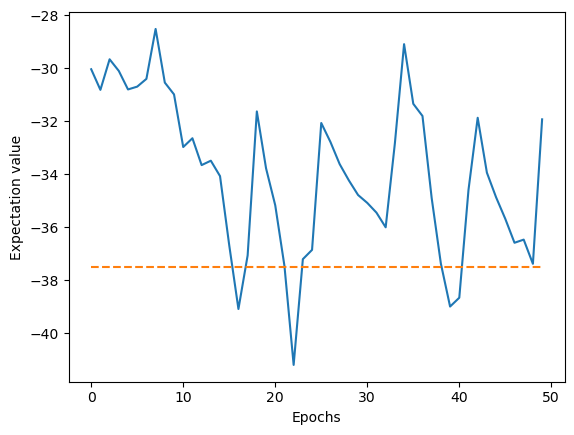

In [25]:
# ground state energy about -1.25 * N
plt.plot(epochs, loss_data)
plt.plot([0, epochs[-1]], [-1.25 * N] * 2, linestyle = '--')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()